In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data into a df

In [11]:
df = pd.read_csv("./data/Clean_Dataset.csv")

In [10]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Exploratory Analysis

In [19]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [14]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [18]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: >

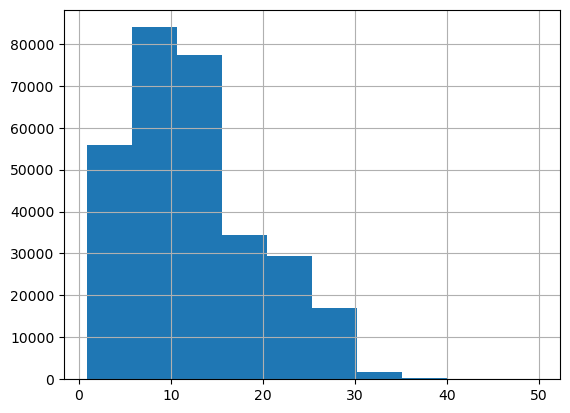

In [20]:
df.duration.hist()

<Axes: >

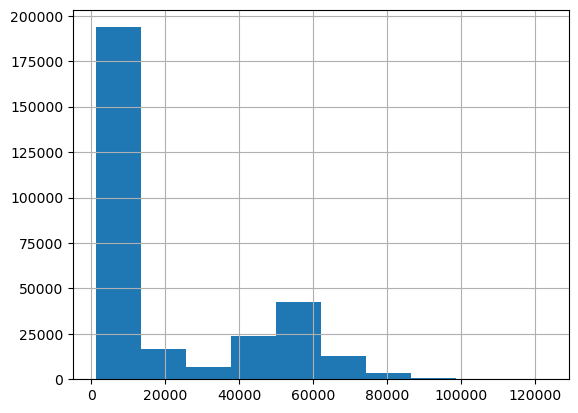

In [21]:
df.price.hist()

In [24]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

# Preprocessing the data

In [22]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [27]:
#Drop columns that are not needed in the prediction
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('flight', axis=1, inplace=True)

#Encode categorical variables
df['class'] = df['class'].map({'Economy': 0, 'Business': 1}) 
df['stops'] = pd.factorize(df['stops'])[0]

In [35]:
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int))
df = df.drop("airline", axis=1)

df = df.join(pd.get_dummies(df.destination_city, prefix="destination_city").astype(int))
df = df.drop("destination_city", axis=1)

df = df.join(pd.get_dummies(df.source_city, prefix="source_city").astype(int))
df = df.drop("source_city", axis=1)

df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival_time").astype(int))
df = df.drop("arrival_time", axis=1)

df = df.join(pd.get_dummies(df.departure_time, prefix="departure_time").astype(int))
df = df.drop("departure_time", axis=1)



In [39]:
#Confirming all categorical variables have been encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   class                         300153 non-null  int64  
 2   duration                      300153 non-null  float64
 3   days_left                     300153 non-null  int64  
 4   price                         300153 non-null  int64  
 5   airline_AirAsia               300153 non-null  int64  
 6   airline_Air_India             300153 non-null  int64  
 7   airline_GO_FIRST              300153 non-null  int64  
 8   airline_Indigo                300153 non-null  int64  
 9   airline_SpiceJet              300153 non-null  int64  
 10  airline_Vistara               300153 non-null  int64  
 11  destination_city_Bangalore    300153 non-null  int64  
 12  destination_city_Chennai      300153 non-nul

# Training a RF Regression Model

In [41]:
X, y = df.drop("price", axis=1), df.price

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
#Performance of the model
y_pred = reg.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.9848814096995339
MSE 7793365.301240571
MAE 1077.50440481117
RMSE 2791.6599544429782


Text(0, 0.5, 'Predicted Price')

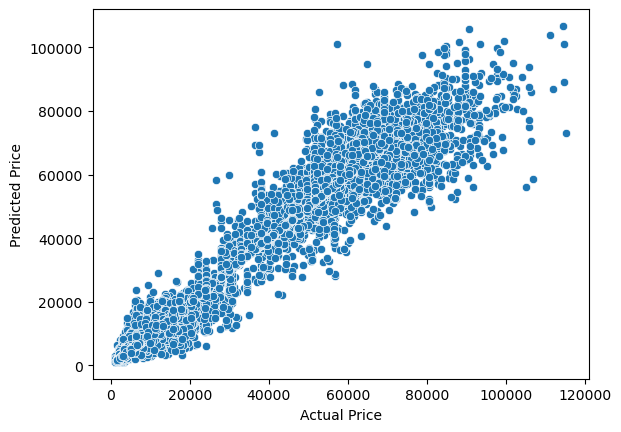

In [64]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [68]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))

In [75]:
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse=True)

In [76]:
sorted_importances

[('class', 0.879811353495633),
 ('duration', 0.05768168849939465),
 ('days_left', 0.01847167177355354),
 ('airline_Vistara', 0.005006597033475016),
 ('airline_Air_India', 0.004955157197405232),
 ('source_city_Delhi', 0.0037454745591999437),
 ('destination_city_Delhi', 0.0034514736357245178),
 ('source_city_Mumbai', 0.002292626181702105),
 ('stops', 0.0018960870678165294),
 ('destination_city_Mumbai', 0.0018952129826897803),
 ('destination_city_Kolkata', 0.0018045632943406123),
 ('source_city_Kolkata', 0.001713936246201925),
 ('arrival_time_Evening', 0.0015657216884018411),
 ('destination_city_Hyderabad', 0.0014925261110409857),
 ('destination_city_Bangalore', 0.0013304053919936136),
 ('source_city_Hyderabad', 0.0012460005437536607),
 ('arrival_time_Night', 0.0011531278681931104),
 ('source_city_Bangalore', 0.0010967654724102225),
 ('departure_time_Evening', 0.0010859567712925087),
 ('arrival_time_Afternoon', 0.0009781120654193988),
 ('destination_city_Chennai', 0.000883288674583994),
 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'class'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'days_left'),
  Text(3, 0, 'airline_Vistara'),
  Text(4, 0, 'airline_Air_India'),
  Text(5, 0, 'source_city_Delhi'),
  Text(6, 0, 'destination_city_Delhi'),
  Text(7, 0, 'source_city_Mumbai'),
  Text(8, 0, 'stops'),
  Text(9, 0, 'destination_city_Mumbai')])

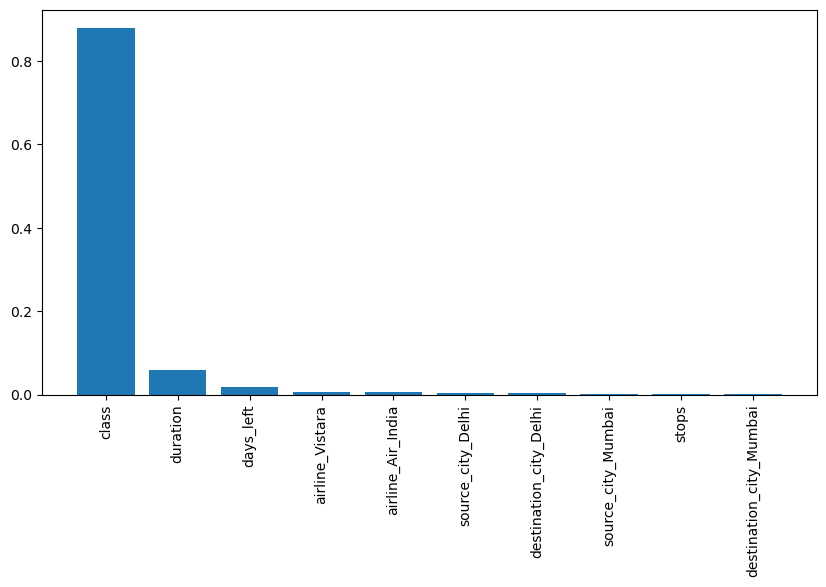

In [81]:
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
plt.xticks(rotation=90)

# Hyperparameter tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [91]:
param_grid = {
    "n_estimators": randint(100,300),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2,11),
    "min_samples_leaf": randint(1, 5)
}

reg = RandomForestRegressor(n_jobs=-1)

rand_search = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, n_iter=2, cv=3, scoring="neg_mean_squared_error", random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

best_regressor = rand_search.best_estimator_

In [97]:
#Performance of the previous model
print("R2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

#Performance of the new model
y_pred_new = best_regressor.predict(X_test)
print("\nNew R2", r2_score(y_test, y_pred_new))
print("New MSE", mean_squared_error(y_test, y_pred_new))
print("New MAE", mean_absolute_error(y_test, y_pred_new))
print("New RMSE", math.sqrt(mean_squared_error(y_test, y_pred_new)))

#Difference in performances 
print("Difference between New and Previous Metrics")
print("\nR2", r2_score(y_test, y_pred_new)-r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred_new)-mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred_new)-mean_absolute_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred_new))-math.sqrt(mean_squared_error(y_test, y_pred)))


R2 0.9848814096995339
MSE 7793365.301240571
MAE 1077.50440481117
RMSE 2791.6599544429782

New R2 0.9859407741034674
New MSE 7247281.729763005
New MAE 1121.4733441989397
New RMSE 2692.0775861336174
Difference between New and Previous Metrics

R2 0.0010593644039335048
MSE -546083.5714775659
MAE 43.96893938776975
RMSE -99.58236830936085
